In [1]:
# Calculate flow rate of cell culture media

In [2]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import csv;
import os;


In [3]:
filename_list = ["1.0psi","2.5psi","3.0psi","4.9psi","7.0psi","10.7psi"]
dispensing_pressure = [1,2.5,3,4.9,7,10.7]


In [4]:
# Make tables of CDC data for each cancer type, for each data type
def parse_csv_loadcell(filename):
        
    # Build filename to look in the Data archive
    file = os.path.join("PBS LoadCell Measurements", filename + ".csv")
        
    # Open CDC files and read in all lines
    data = []; x = [0, 0, 0, 0]; time = []; force = [];
    with open(file, 'r') as f:  
        data = f.readlines()
    
    data = data[9:]
    
    for line in data: 
        x = line.split(",")
        time_item = float(x[1])
        force_item = float(x[2])
        #print("Sought item: {}".format(time_item))
        #print("Force item: {}".format(force_item))
        
        if force_item > 0:
            time.append(time_item)
            force.append(force_item)
        
    return(time, force)


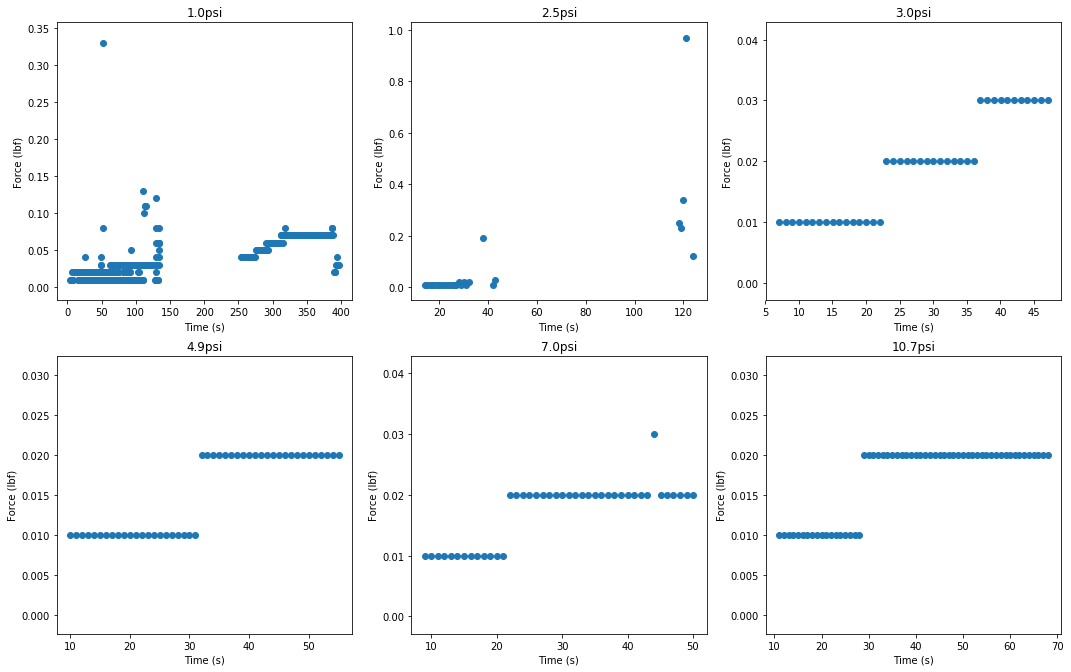

In [5]:
mass_flow_rate_list = []; intercept_list = []; 

box_size = 4.5; fig = plt.figure(1, figsize=(4*box_size, 2.5*box_size)); plot_number = 230;

for file in range(len(filename_list)):
    plot_number = plot_number+1;  
    ax = fig.add_subplot(plot_number);
    time, force = parse_csv_loadcell(filename_list[file])
    
    plt.scatter(time, force) 
    slope, intercept = np.polyfit(time,force,1)
    newtons = slope * 4.4482216; 
    mass_flow_rate = newtons * 1000;
    
    mass_flow_rate_list.append(mass_flow_rate)
    intercept_list.append(intercept)
    
    plt.title(filename_list[file])
    plt.xlabel("Time (s)"); 
    plt.ylabel("Force (lbf)"); 

filename_to_save = os.path.join("Figures" , "PBS Flow Rate" + ".jpg")
plt.show()